In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [26]:
df = pd.read_csv('accidentUTC.csv')
dfdrug = pd.read_csv('drugsUTC.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39508 entries, 0 to 39507
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         39508 non-null  int64  
 1   STATENAME     39508 non-null  object 
 2   ST_CASE       39508 non-null  int64  
 3   PEDS          39508 non-null  int64  
 4   PERNOTMVIT    39508 non-null  int64  
 5   VE_TOTAL      39508 non-null  int64  
 6   VE_FORMS      39508 non-null  int64  
 7   PVH_INVL      39508 non-null  int64  
 8   PERSONS       39508 non-null  int64  
 9   PERMVIT       39508 non-null  int64  
 10  COUNTY        39508 non-null  int64  
 11  COUNTYNAME    39508 non-null  object 
 12  CITY          39508 non-null  int64  
 13  CITYNAME      39508 non-null  object 
 14  MONTH         39508 non-null  int64  
 15  MONTHNAME     39508 non-null  object 
 16  DAY           39508 non-null  int64  
 17  DAYNAME       39508 non-null  int64  
 18  DAY_WEEK      39508 non-nu

In [28]:
dfdrug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116162 entries, 0 to 116161
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   STATE         116162 non-null  int64 
 1   STATENAME     116162 non-null  object
 2   ST_CASE       116162 non-null  int64 
 3   VEH_NO        116162 non-null  int64 
 4   PER_NO        116162 non-null  int64 
 5   DRUGSPEC      116162 non-null  int64 
 6   DRUGSPECNAME  116162 non-null  object
 7   DRUGRES       116162 non-null  int64 
 8   DRUGRESNAME   116162 non-null  object
dtypes: int64(6), object(3)
memory usage: 8.0+ MB


In [29]:
top_five_states = df['STATENAME'].value_counts().nlargest(5).index

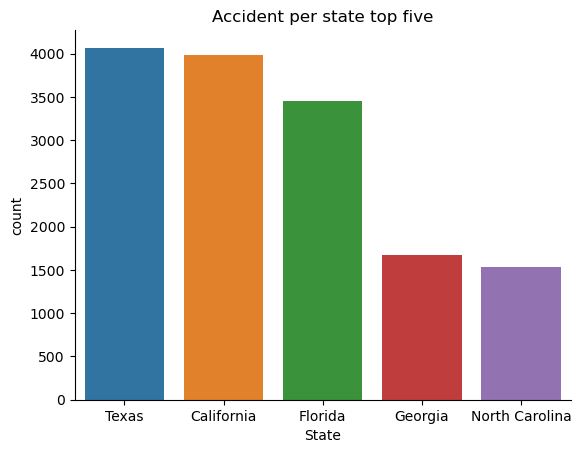

In [30]:
sns.countplot(data=df, x='STATENAME', order=top_five_states)
plt.xlabel('State')
plt.ylabel('count')
plt.title('Accident per state top five')
sns.despine()
plt.show()

In [31]:
DAY_IN_ORDER = df['DAY_WEEKNAME'].value_counts().nlargest(7).index

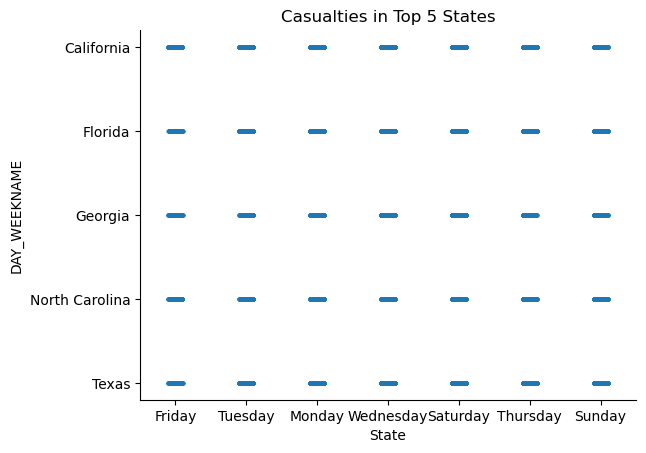

In [32]:
df_top_five_states = df[df['STATENAME'].isin(top_five_states)]

sns.stripplot(data=df_top_five_states, x='DAY_WEEKNAME', y='STATENAME', size=3, jitter=True)
plt.xlabel('State')
plt.ylabel('DAY_WEEKNAME')
plt.title('Casualties in Top 5 States')
sns.despine()
plt.show()

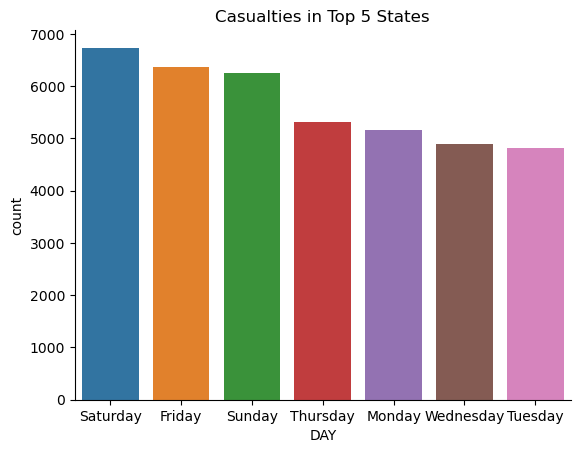

In [33]:
sns.countplot(data=df, x='DAY_WEEKNAME', order= DAY_IN_ORDER)
plt.xlabel('DAY')
plt.ylabel('count')
plt.title('Casualties in Top 5 States')
sns.despine()
plt.show()

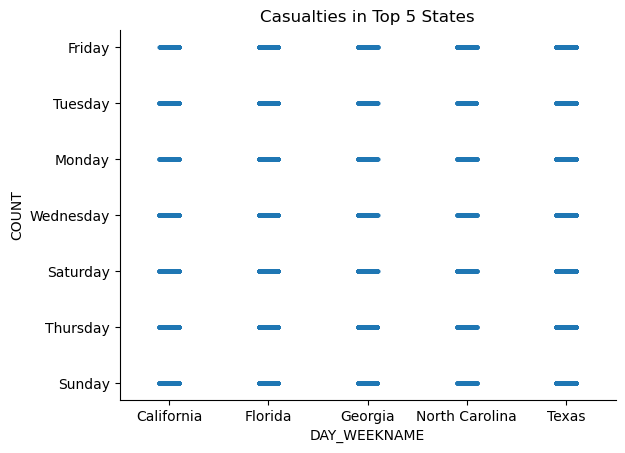

In [35]:
sns.stripplot(data=df_top_five_states, x='STATENAME', y='DAY_WEEKNAME', size=3)
plt.xlabel('DAY_WEEKNAME')
plt.ylabel('COUNT')
plt.title('Casualties in Top 5 States')
sns.despine()
plt.show()

In [47]:
df['DAY_WEEK'] = pd.to_datetime(df['DAY_WEEK'])

In [53]:
top_five_states = df['STATENAME'].value_counts().nlargest(5).index
df_top_five_states = df[df['STATENAME'].isin(top_five_states)]

In [58]:
ccidents_by_day = df_top_five_states.groupby(['STATENAME', df_top_five_states['DAY_WEEK'].dt.dayofweek])['DAY_WEEK'].count().reset_index(name='Accident Count')

In [62]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_by_day['DAY_WEEK'] = pd.Categorical(accidents_by_day['DAY_WEEK'], categories=days_of_week, ordered=True)

In [63]:
accidents_by_day = accidents_by_day.sort_values(by=['STATENAME', 'DAY_WEEK'])

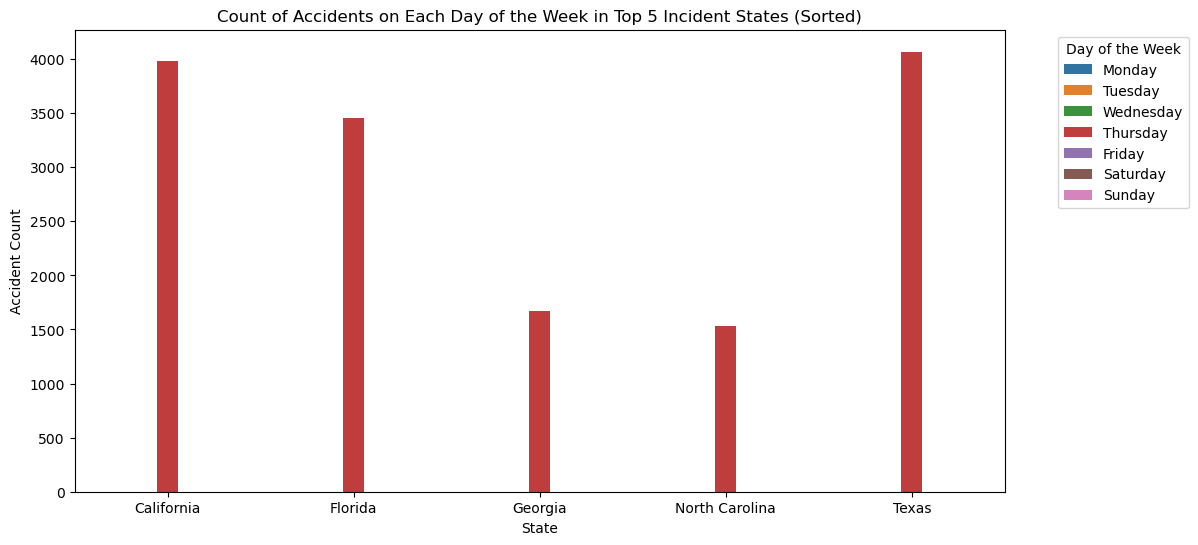

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_day, x='STATENAME', y='Accident Count', hue='DAY_WEEK')
plt.xlabel('State')
plt.ylabel('Accident Count')
plt.title('Count of Accidents on Each Day of the Week in Top 5 Incident States (Sorted)')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

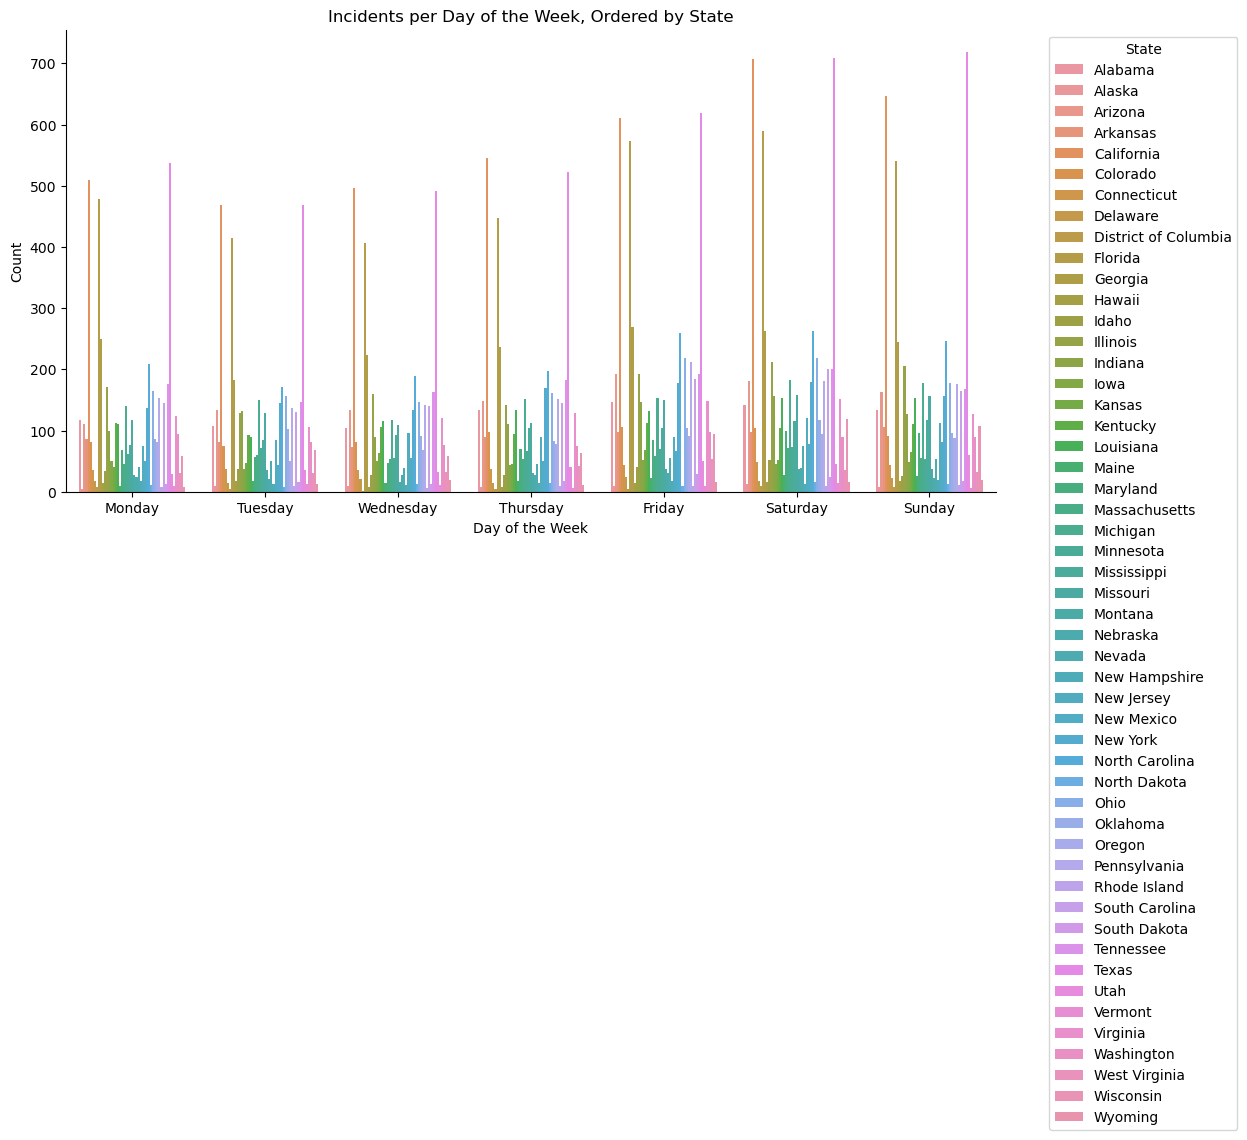

In [66]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [67]:
df_texas = df[df['STATENAME'] == 'Texas']

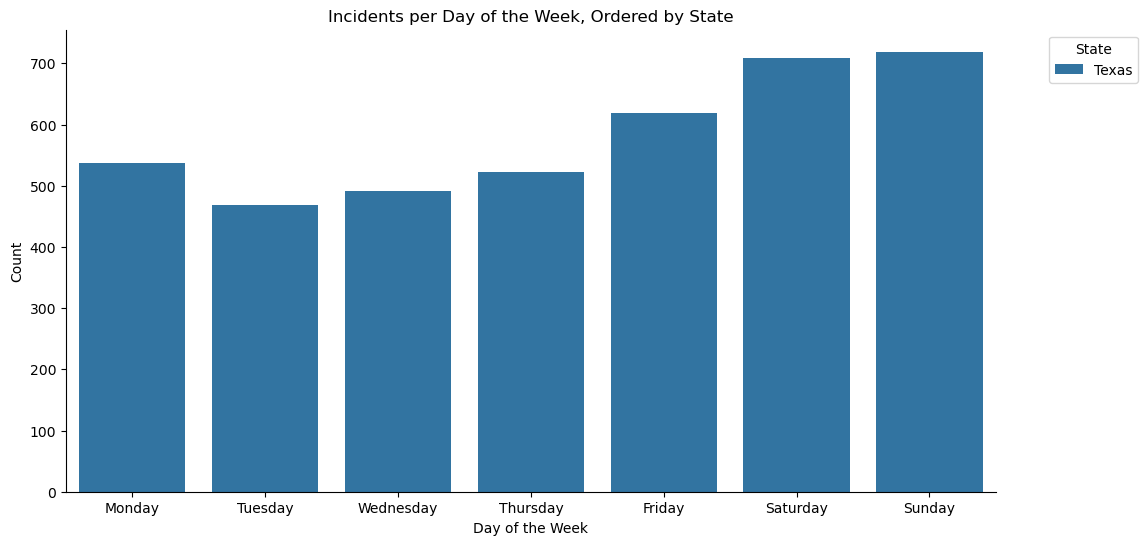

In [68]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_texas, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [69]:
df_Florida = df[df['STATENAME'] == 'Florida']
df_Georgia = df[df['STATENAME'] == 'Georgia']
df_California = df[df['STATENAME'] == 'California']
df_North_Carolina = df[df['STATENAME'] == 'North Carolina']

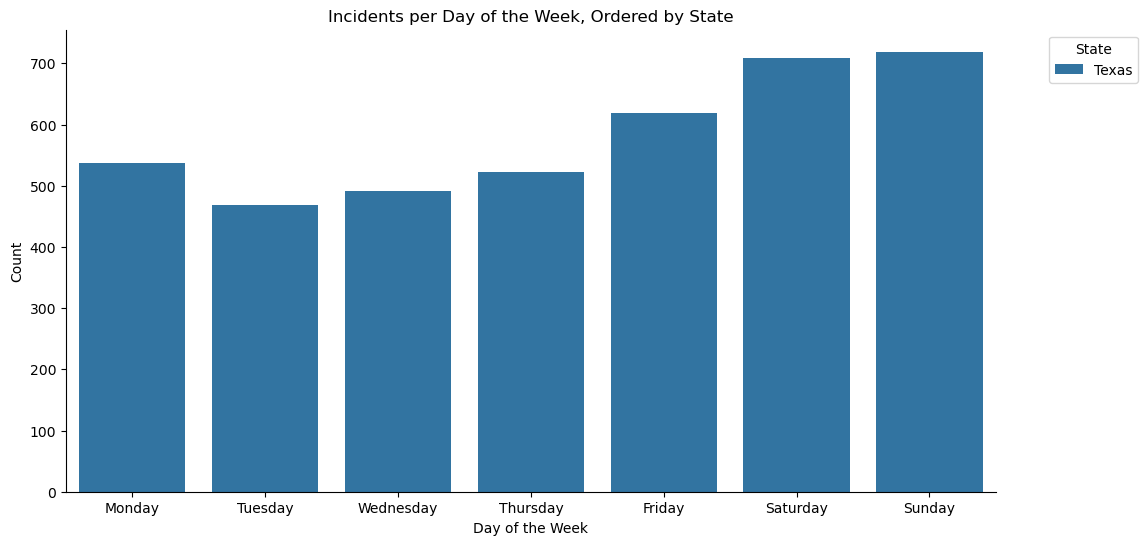

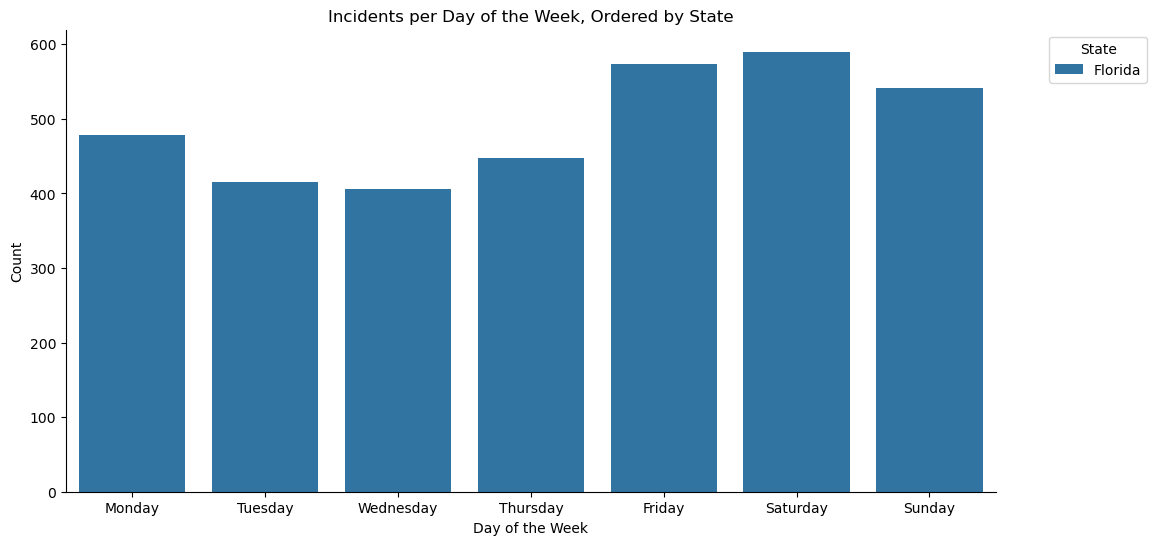

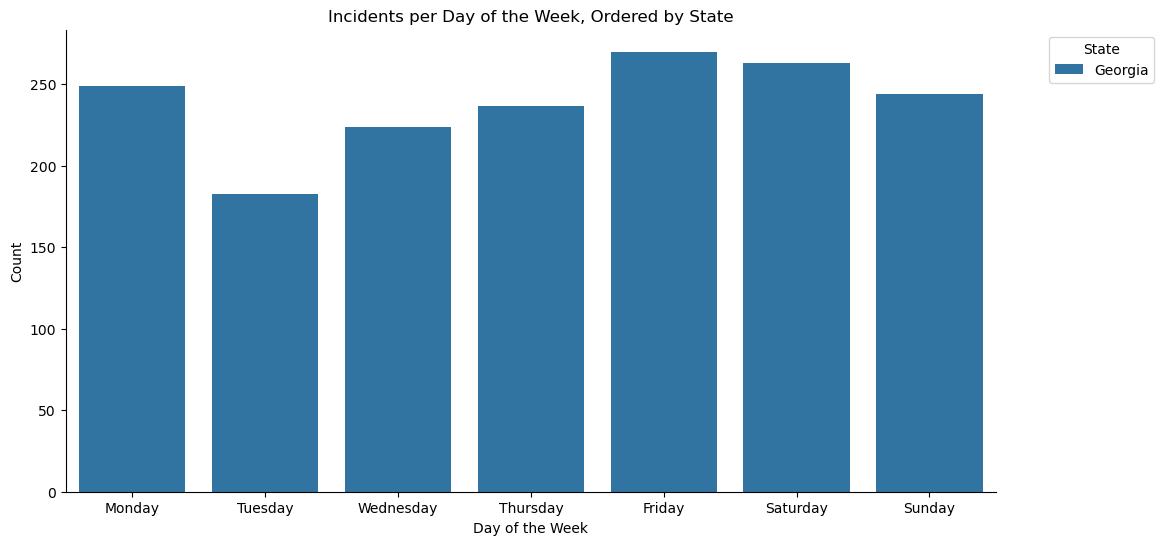

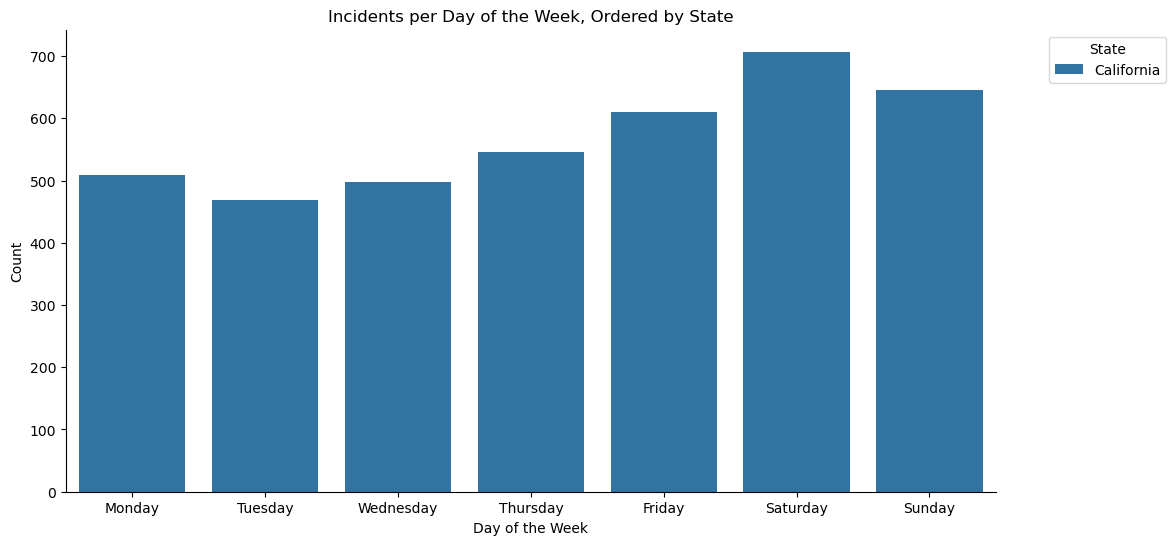

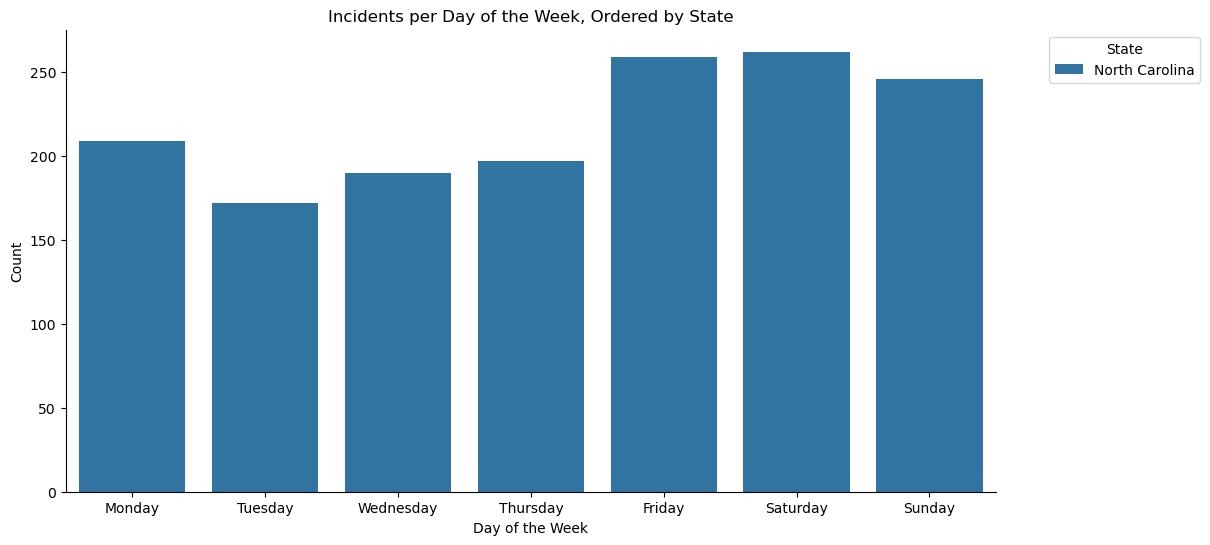

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_texas, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_Florida, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_Georgia, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_California, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_North_Carolina, x='DAY_WEEKNAME', order=days_of_week, hue='STATENAME')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Incidents per Day of the Week, Ordered by State')
sns.despine()
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()